# Logistic model fitting using Sequential Monte Carlo

This example illustrates how to use SMC to sample from a posterior distribution for the logistic model, with normal errors. This example also indicates how it is typically necessary to tune hyperparameters to ensure good algorithmic performance on a given problem.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [-5, 400, noise*0.1],
    [5, 600, noise*100]
)

In [2]:
# Create mcmc routine
smc = pints.SMCController(log_likelihood, log_prior)

# Set number of particles
smc.sampler().set_n_particles(10000)

# Run sampler
samples = smc.run()

Using Sequential Monte Carlo
Total number of particles: 10000
Number of temperatures: 10
Number of MCMC steps at each temperature: 1


/home/michael/dev/pints/pints/toy/_logistic_model.py:66: RuntimeWarning: overflow encountered in exp
  exp = np.exp(-r * times)
/home/michael/dev/pints/pints/toy/_logistic_model.py:69: RuntimeWarning: overflow encountered in multiply
  values = k / (1 + c * exp)


i     Eval. Temperature Time m:s
0     10000  0.9999       0:01.8


/home/michael/dev/pints/pints/_sequential/_SMC.py:181: RuntimeWarning: divide by zero encountered in log
  self._weights[j] = np.log(w) + self._w_tilde(


1     20000  0.99972      0:06.5
2     30000  0.99923      0:11.2


/home/michael/dev/pints/pints/_log_likelihoods.py:155: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


3     40000  0.99785      0:15.8
4     50000  0.99401      0:20.3
5     60000  0.98332      0:24.7
6     70000  0.95358      0:29.2
7     80000  0.87085      0:33.7
8     90000  0.64062      0:38.1


/home/michael/dev/pints/pints/_sequential/_SMC.py:261: RuntimeWarning: invalid value encountered in double_scalars
  return beta * fx + (1 - beta) * f_prior


9     100000  0            0:42.8


## Plot results

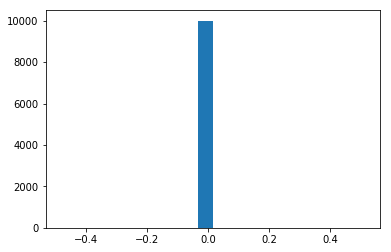

9999.99999999924


In [3]:
plt.hist(samples[:, 0], 20)
plt.show()
print(smc.sampler().ess())